In [1]:
from scipy.fftpack import dct,idct
import scipy
import numpy as np
from PIL import Image, ImageDraw,ImageFont
import os
import matplotlib.pyplot as plt
import os
import operator

In [2]:
Q = [[16, 11, 10, 16, 24, 40, 51, 61],
     [12, 12, 14, 19, 26, 58, 60, 55],
     [14, 13, 16, 24, 40, 57, 69, 56],
     [14, 17, 22, 29, 51, 87, 80, 62],
     [18, 22, 37, 56, 68 ,109 ,103 ,77],
     [24, 35, 55, 64, 81 ,104 ,113 ,92],
     [49, 64, 78, 87, 103, 121, 120, 101],
     [72, 92, 95, 98, 112, 100, 103, 99]]
temp = {}
freq = {}
g = 0

In [3]:
def dct2(a):
    new_matrix = np.zeros((8,8))
    b = np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            b[i][j] = a[i][j] - 128
    c = scipy.fftpack.dct( scipy.fftpack.dct( b, axis=0, norm='ortho' ), axis=1, norm='ortho' )
    for i in range(8):
        for j in range(8):
            new_matrix[i][j] = np.fix(np.divide(c[i][j],Q[i][j]))
    return c,new_matrix

In [4]:
def zigzag(matrix):
    global g
    con = 0
    matrix = np.array(matrix)
    rows=8
    columns=8
    aux = np.zeros((1,64))
    x = np.zeros((1,64))
    y = np.zeros((1,64))
    solution=[[] for i in range(rows+columns-1)]
    
    for i in range(rows): 
        for j in range(columns): 
            sum=i+j
            
            if(sum%2 ==0):
                solution[sum].insert(0,matrix[i][j]) 
            
            else:
                solution[sum].append(matrix[i][j])
              
    solucion = solution.reverse()
    for i in solution:
        for j in i:
            if j == -0.0:
                j = abs(j)
                aux[0,con] = j
            else:
                aux[0,con] = j 
    indice = 0
    for i in range(0,64):
        if(aux[0,i]!= 0):
            indice = i
            break
    for i in range(indice,64):
        temp[g] = aux[0,i]
        if aux[0,i] in freq:
            pass
        else:
            freq[aux[0,i]] = aux[0,i]
        g = g+1

In [5]:
def crop(img,N):   
    J = np.zeros(shape=(N,N))
    for i in range(N):
        for j in range(N):
            J[i,j] = img[i,j]
    return J

In [7]:
matrix = Image.open("moon.png")
matrix = matrix.convert('L')
alto, ancho = matrix.size

In [8]:
a = np.asarray(matrix,dtype=np.float32)
a.shape

(256, 256)

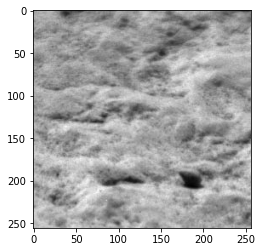

In [9]:
plt.imshow(a,cmap='gray')

In [10]:
im2 = np.zeros((256,256))

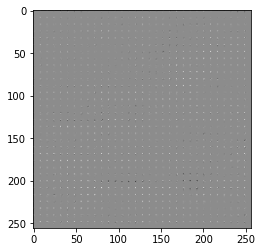

In [11]:
im2 = np.zeros((256,256))
for i in range(0,256,8):
    for j in range(0,256,8):
        c,im2[i:i+8,j:j+8] = dct2(a[i:i+8,j:j+8])
plt.imshow(im2,cmap='gray')

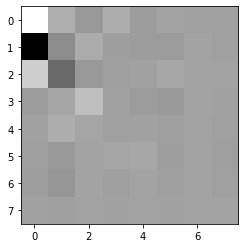

In [14]:
plt.imshow(c,cmap='gray')

In [15]:
print(im2)

[[12. -1. -0. ...  0.  0.  0.]
 [-0. -1.  0. ... -0.  0. -0.]
 [ 1.  0.  0. ... -0.  0. -0.]
 ...
 [ 0. -0. -0. ... -0.  0. -0.]
 [ 0.  0.  0. ... -0.  0. -0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [16]:
a.shape

(256, 256)

In [17]:
im2.shape

(256, 256)

In [18]:
for i in range(0,256,8):
        for j in range(0,256,8):
            zigzag(im2[i:(i+8),j:(j+8)])

In [19]:
f = open("dct.txt","w")
for i in range(0,256):
    for j in range(0,256):
        if im2[i,j] == -0.0:
            f.write(str(abs(im2[i,j]))+" ")
        else:
            f.write(str(im2[i,j])+" ")
    f.write("\n")

In [20]:
keys = list(freq.keys())
ele = list(temp.values())
nk = len(keys)
ne = len(ele)
prob = {}
for i in keys:
    elem = float(ele.count(i))
    prob[i] = elem/float(len(ele))

In [21]:
def save(dic,keys):
    pos = 0
    file = open("probs.txt","w")
    for i in dic:
        file.write(str(keys[pos]) +"\t"+ str(prob.get(i,i))+"\n");
        pos += 1

In [22]:
save(prob,keys)

In [23]:
p = "probs.txt"

In [24]:
def huffmanCode(dic):
    if(len(dic) == 2):
        return dict(zip(dic.keys(), ['0', '1']))
    p_copy = dic.copy()
    # makes a copy of the probability dictionary since later the elements that are marked
    # with the keys returned by the method sort_probabilities will be removed from the original dictionary
    # assert (sum (dic.values ​​()) == 1.0) # Ensure probabilities sum to 1
    K = sorted(dic.items(), key = operator.itemgetter(1), reverse=False)
    K1= K[0][0]
    K2 = K[1][0]
    p1, p2 = p_copy.pop(K1), p_copy.pop(K2)
    p_copy[K1 + K2] = p1 + p2
    c = huffmanCode(p_copy)
    ca1a2 = c.pop(K1 + K2)
    c[K1], c[K2] = ca1a2 + '0', ca1a2 + '1'
    return c

In [25]:
prob = {}
line = ""
archivo = open(p,'r');
for i in  archivo:
    line = i.split("\t")
    if(line[0] == "space"):
        pass
    elif(line[0]=="salto"):
        pass
    else:
        prob[line[0]] = float(line[1].rstrip())
print(prob)

{'12.0': 0.0008544921875, '0.0': 0.9849700927734375, '14.0': 0.000762939453125, '15.0': 0.000762939453125, '6.0': 0.0007171630859375, '-16.0': 3.0517578125e-05, '-14.0': 4.57763671875e-05, '-7.0': 0.0001068115234375, '1.0': 0.000396728515625, '-1.0': 0.00018310546875, '11.0': 0.0006866455078125, '7.0': 0.000762939453125, '8.0': 0.0008544921875, '10.0': 0.0006561279296875, '20.0': 0.0005035400390625, '3.0': 0.000518798828125, '-2.0': 0.0002288818359375, '-8.0': 0.0001220703125, '-4.0': 0.00018310546875, '5.0': 0.0006103515625, '-9.0': 4.57763671875e-05, '4.0': 0.00054931640625, '13.0': 0.00079345703125, '-6.0': 0.0001220703125, '9.0': 0.0006561279296875, '-3.0': 0.0001068115234375, '-11.0': 6.103515625e-05, '-13.0': 6.103515625e-05, '17.0': 0.00048828125, '2.0': 0.0003662109375, '16.0': 0.000518798828125, '18.0': 0.0004119873046875, '-10.0': 3.0517578125e-05, '-5.0': 0.0001220703125, '24.0': 0.0001220703125, '26.0': 9.1552734375e-05, '27.0': 7.62939453125e-05, '23.0': 0.0001983642578125

In [26]:
dct = {'12.0': 0.0008544921875, '0.0': 0.9849700927734375, '14.0': 0.000762939453125, '15.0': 0.000762939453125, '6.0': 0.0007171630859375, '-16.0': 3.0517578125e-05, '-14.0': 4.57763671875e-05, '-7.0': 0.0001068115234375, '1.0': 0.000396728515625, '-1.0': 0.00018310546875, '11.0': 0.0006866455078125, '7.0': 0.000762939453125, '8.0': 0.0008544921875, '10.0': 0.0006561279296875, '20.0': 0.0005035400390625, '3.0': 0.000518798828125, '-2.0': 0.0002288818359375, '-8.0': 0.0001220703125, '-4.0': 0.00018310546875, '5.0': 0.0006103515625, '-9.0': 4.57763671875e-05, '4.0': 0.00054931640625, '13.0': 0.00079345703125, '-6.0': 0.0001220703125, '9.0': 0.0006561279296875, '-3.0': 0.0001068115234375, '-11.0': 6.103515625e-05, '-13.0': 6.103515625e-05, '17.0': 0.00048828125, '2.0': 0.0003662109375, '16.0': 0.000518798828125, '18.0': 0.0004119873046875, '-10.0': 3.0517578125e-05, '-5.0': 0.0001220703125, '24.0': 0.0001220703125, '26.0': 9.1552734375e-05, '27.0': 7.62939453125e-05, '23.0': 0.0001983642578125, '22.0': 0.0002288818359375, '21.0': 0.0003814697265625, '25.0': 0.0001373291015625, '28.0': 3.0517578125e-05, '19.0': 0.0002899169921875, '-12.0': 1.52587890625e-05, '-29.0': 1.52587890625e-05, '-27.0': 1.52587890625e-05, '30.0': 1.52587890625e-05, '-30.0': 1.52587890625e-05, '-38.0': 1.52587890625e-05, '-19.0': 1.52587890625e-05, '29.0': 3.0517578125e-05, '31.0': 1.52587890625e-05}

In [ ]:
'''
dct = {'7.0': 0.0001068115234375, '0.0': 0.9846852620442709, '10.0': 7.120768229166667e-05,
       '13.0': 8.138020833333333e-05, '15.0': 9.663899739583333e-05, '18.0': 4.57763671875e-05, 
       '20.0': 0.00011698404947916667, '21.0': 0.0001068115234375, '23.0': 8.646647135416667e-05, 
       '24.0': 0.00012715657552083334, '25.0': 0.00020853678385416666, '26.0': 0.00023396809895833334, 
       '27.0': 0.00020853678385416666, '29.0': 0.0002543131510416667, '30.0': 0.0003000895182291667, 
       '28.0': 0.000274658203125, '17.0': 8.138020833333333e-05, '12.0': 6.103515625e-05, 
       '31.0': 0.0003712972005208333, '22.0': 8.138020833333333e-05, '32.0': 0.0004984537760416666, 
       '33.0': 0.0007425944010416666, '34.0': 0.0007578531901041666, '35.0': 0.0007375081380208334,
       '36.0': 0.00011189778645833333, '16.0': 7.120768229166667e-05, '3.0': 0.00014241536458333334, 
       '-2.0': 0.0001678466796875, '-14.0': 0.000213623046875, '-21.0': 0.0001983642578125,
       '-27.0': 0.00018310546875, '-33.0': 0.0001068115234375, '-17.0': 0.0002899169921875, 
       '5.0': 0.00015767415364583334, '-4.0': 0.00016276041666666666, '-5.0': 0.00023396809895833334, 
       '-35.0': 0.00014241536458333334, '-28.0': 0.00018310546875, '-3.0': 0.00020853678385416666,
       '-38.0': 0.0001220703125, '-15.0': 0.000213623046875, '-18.0': 0.0002492268880208333, 
       '-1.0': 0.00014241536458333334, '-40.0': 0.0001220703125, '-34.0': 0.00011698404947916667, 
       '14.0': 0.00011698404947916667, '6.0': 9.663899739583333e-05, '-36.0': 0.00016276041666666666, 
       '-25.0': 0.0001678466796875, '-19.0': 0.0002492268880208333, '-32.0': 0.0001220703125,
       '-20.0': 0.00020853678385416666, '-22.0': 0.0002288818359375, '1.0': 0.00011189778645833333, 
       '8.0': 0.0001068115234375, '-9.0': 0.0002899169921875, '-29.0': 0.00019327799479166666, 
       '-8.0': 0.000244140625, '4.0': 0.00016276041666666666, '-7.0': 0.00018819173177083334, 
       '-6.0': 0.000244140625, '-11.0': 0.00017293294270833334, '19.0': 5.0862630208333336e-05, 
       '-31.0': 0.00020853678385416666, '-24.0': 0.0001678466796875, '2.0': 0.00015767415364583334, 
       '-37.0': 0.00011189778645833333, '-44.0': 0.00013224283854166666, '-16.0': 0.00015767415364583334, 
       '-43.0': 6.612141927083333e-05, '-13.0': 0.000213623046875, '-41.0': 0.0001373291015625, 
       '-10.0': 0.00018819173177083334, '9.0': 7.120768229166667e-05, '-30.0': 0.0002288818359375, 
       '-23.0': 0.00016276041666666666, '-42.0': 0.0001068115234375, '-26.0': 0.00014750162760416666, 
       '-12.0': 0.00020853678385416666, '-45.0': 0.000213623046875, '-46.0': 0.00011698404947916667, 
       '11.0': 5.0862630208333336e-05, '-39.0': 6.612141927083333e-05, '-47.0': 1.52587890625e-05, 
       '40.0': 5.086263020833333e-06, '47.0': 1.0172526041666666e-05, '41.0': 5.086263020833333e-06, 
       '38.0': 2.5431315104166668e-05, '37.0': 1.52587890625e-05, '39.0': 1.0172526041666666e-05, 
       '42.0': 5.086263020833333e-06}
'''

In [27]:
table = {}
table = huffmanCode(dct)

In [28]:
print("Corresponding Huffman Codes")
for i in table:
    print (table.get(0,i) +"\t"+ table.get(i,i))

Corresponding Huffman Codes
0.0	0
8.0	11000
12.0	10111
13.0	10101
15.0	10010
7.0	10011
14.0	10001
11.0	111110
6.0	111111
10.0	111100
9.0	111101
5.0	111011
16.0	111000
4.0	111001
20.0	110110
3.0	110111
17.0	110100
18.0	101101
21.0	101000
1.0	101001
2.0	100000
19.0	1110100
-2.0	1100100
22.0	1100101
23.0	1011000
-1.0	1000010
-4.0	1000011
25.0	11101010
24.0	11010100
-6.0	11001110
-5.0	11001111
-3.0	11001100
-8.0	11001101
-7.0	10110011
27.0	111010110
26.0	111010111
-11.0	110101010
-13.0	110101011
-14.0	101100100
-9.0	101100101
28.0	1101011010
29.0	1101011011
-16.0	1101011000
-10.0	1101011001
-19.0	11010111110
31.0	11010111111
-30.0	11010111100
-38.0	11010111101
-27.0	11010111010
30.0	11010111011
-12.0	11010111000
-29.0	11010111001


In [29]:
with open("dct.txt",'r') as txt:
	txt = (txt.read().rstrip()).lower()
	encoded = ""
	for i in txt.split():
		if i in table:
			encoded = encoded + table[i]
	pad = 8 - len(encoded)%8
	for i in range(8-len(encoded)%8):
		encoded += "0"
	padded = "{0:08b}".format(pad)
	encoded += padded
	
	cb = bytearray()
	for i in range(0,len(encoded),8):
		cb.append(int(encoded[i:i+8],2))

In [30]:
f = open("compress.dat","wb")
f.write(bytes(cb))

11919

In [33]:
s1 = os.path.getsize("dct.txt")
s2 = os.path.getsize("compress.dat")
s3 = os.path.getsize("moon.png")
ratio = s1/s2

In [36]:
print("Original Image:",s3)
print("DCT Matrix :",s1)
print("Compressed form:",s2)
print("Compression Ratio achieved :",ratio)

Original Image: 107134
DCT Matrix : 265393
Compressed form: 11919
Compression Ratio achieved : 22.266381407836228
